<a href="https://colab.research.google.com/github/karmabir/Agri-Cultivate/blob/main/PlantDoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Icevision

In [1]:
# # Torch - Torchvision - IceVision - IceData - MMDetection - YOLOv5 - EfficientDet Installation
!wget https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh

# # Choose your installation target: cuda11 or cuda10 or cpu
!bash icevision_install.sh cuda11 master

--2023-02-19 15:47:49--  https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2820 (2.8K) [text/plain]
Saving to: ‘icevision_install.sh.1’

icevision_install.s 100%[===================>]   2.75K  --.-KB/s    in 0s      

2023-02-19 15:47:49 (39.9 MB/s) - ‘icevision_install.sh.1’ saved [2820/2820]

Installing icevision + dependencices for cuda11
- Installing torch and its dependencies
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
- Installing mmcv
- Installing mmdet
- Installing mmseg
- Installing icevision from master
  Preparing metadata (setup.py) ... done
- Inst

In [2]:
!pip install -U pillow
from icevision.all import *


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-9.4.0-cp38-cp38-manylinux_2_28_x86_64.whl (3.4 MB)
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
icevision 0.12.0 requires pillow<9,>8.0.0, but you have pillow 9.4.0 which is incompatible.
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


INFO     - The mmdet config folder already exists. No need to downloaded it. Path : /root/.icevision/mmdetection_configs/mmdetection_configs-2.20.1/configs | icevision.models.mmdet.download_configs:download_mmdet_configs:17
INFO     - The mmseg config folder already exists. No need to downloaded it. Path : /root/.icevision/mmsegmentation_configs/mmsegmentation_configs-0.17.0/configs | icevision.models.mmseg.download_configs:download_mmseg_configs:19


In [3]:
!git clone https://github.com/pratikkayal/PlantDoc-Object-Detection-Dataset.git

fatal: destination path 'PlantDoc-Object-Detection-Dataset' already exists and is not an empty directory.


In [4]:
#Changing current directory 
%cd PlantDoc-Object-Detection-Dataset/

/content/PlantDoc-Object-Detection-Dataset


In [5]:
import pandas as pd 

annot = pd.read_csv('train_labels.csv')
annot.rename(columns = {'class' : 'label'}, inplace = True) # to avoid semantic conflicts 
annot.sample(5)

filename  width  height                     label  \
441                 IMG_3192.JPG.jpg   1600    1600               Tomato leaf   
5698            grape+leaves.JPG.jpg   1440    1080                grape leaf   
4720  strawberry-leaves-14363881.jpg   1300     960           Strawberry leaf   
3568                    IMG_0014.jpg   4000    3000  Potato leaf early blight   
5673                P1015775.JPG.jpg   1600    1197                Peach leaf   

      xmin  ymin  xmax  ymax  
441    788   198  1044   356  
5698   830   427  1355   910  
4720   294   292   746   749  
3568  2190   398  2938  1601  
5673    24    16   403   342

In [6]:
annot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  8469 non-null   object
 1   width     8469 non-null   int64 
 2   height    8469 non-null   int64 
 3   label     8469 non-null   object
 4   xmin      8469 non-null   int64 
 5   ymin      8469 non-null   int64 
 6   xmax      8469 non-null   int64 
 7   ymax      8469 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 529.4+ KB


In [7]:
len(annot.label.unique().tolist())

29

In [8]:
_CLASSES = annot["label"].unique().tolist()
_CLASSES

['Cherry leaf',
 'Peach leaf',
 'Corn leaf blight',
 'Apple rust leaf',
 'Potato leaf late blight',
 'Strawberry leaf',
 'Corn rust leaf',
 'Tomato leaf late blight',
 'Tomato mold leaf',
 'Potato leaf early blight',
 'Apple leaf',
 'Tomato leaf yellow virus',
 'Blueberry leaf',
 'Tomato leaf mosaic virus',
 'Raspberry leaf',
 'Tomato leaf bacterial spot',
 'Squash Powdery mildew leaf',
 'grape leaf',
 'Corn Gray leaf spot',
 'Tomato Early blight leaf',
 'Apple Scab Leaf',
 'Tomato Septoria leaf spot',
 'Tomato leaf',
 'Soyabean leaf',
 'Bell_pepper leaf spot',
 'Bell_pepper leaf',
 'grape leaf black rot',
 'Potato leaf',
 'Tomato two spotted spider mites leaf']

Using IceVision predefined VOC parser

In [9]:
Path('./TRAIN').ls()

(#4720) [Path('TRAIN/1895543477_9d19ad5257_b.jpg'),Path('TRAIN/potato_late-blight_08_zoom.xml'),Path('TRAIN/earlyblightpotato.jpg'),Path('TRAIN/blueberry-leaves-safe.jpeg.xml'),Path('TRAIN/bacterialLeafSpot04-xqxm03.jpg'),Path('TRAIN/trim-the-stem.xml'),Path('TRAIN/Cherry-Fruit-and-Leaves-tp1263.xml'),Path('TRAIN/Kdefsoybean.JPG.jpg'),Path('TRAIN/leaves-of-a-raspberry-stock-photo-1214081.xml'),Path('TRAIN/IMG_3166_1500x1500%253E.JPG?1473520197.xml')...]

In [10]:
data_dir = Path('./TRAIN')
parser = parsers.voc(annotations_dir=data_dir, images_dir=data_dir)
train_records, valid_records = parser.parse()

WARNING  - This function will be deprecated, instantiate the concrete classes instead: `VOCBBoxParser`, `VOCMaskParser` | icevision.parsers.voc_parser:voc:17


  0%|          | 0/2356 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/2355 [00:00<?, ?it/s]

AUTOFIX-SUCCESS - (record_id: 2f73110f80014a25a53f9551c94bf164.png) - Clipping bbox xmax from 525 to image width 0 (Before: <BBox (xmin:58, ymin:92, xmax:525, ymax:386)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 2f73110f80014a25a53f9551c94bf164.png) - Clipping bbox ymax from 386 to image height 0 (Before: <BBox (xmin:58, ymin:92, xmax:0, ymax:386)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-FAIL - (record_id: 2f73110f80014a25a53f9551c94bf164.png) - Cannot auto-fix coordinates: <BBox (xmin:58, ymin:92, xmax:0, ymax:0)>
	x_min:58 is greater than or equal to x_max:0
	y_min:92 is greater than or equal to y_max:0 | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-REPORT - (record_id: 2f73110f80014a25a53f9551c94bf164.png) Removed annotation with index: 0, for more info check the AUTOFIX-FAIL messages above | icevision.core.record:autofix:45
WARNING  - (record_id: NCLB) - 🚫 Record could not be autofixed and will be removed because: File 'TRAIN

In [11]:
# train_records, valid_records = parser.parse()

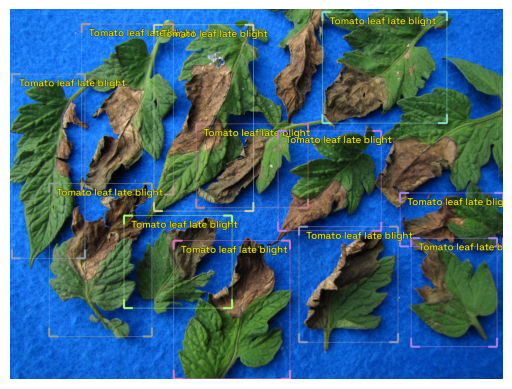

In [12]:
show_record(train_records[0], font_size=24, label_color = '#ffff00')

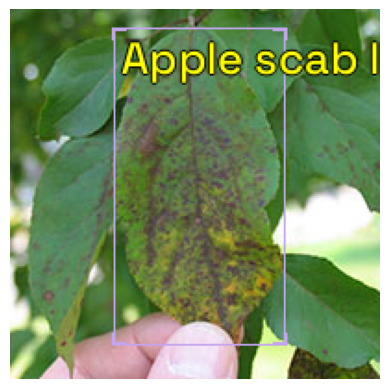

In [13]:
show_record(train_records[1], font_size=24, label_color = '#ffff00')

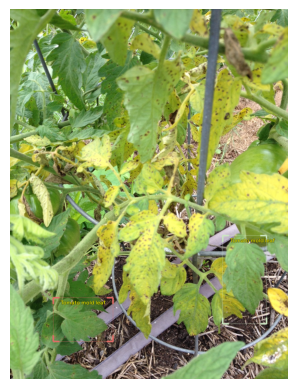

In [14]:
show_record(train_records[2], font_size=24, label_color = '#ffff00')

In [15]:
train_records[1]

BaseRecord

common: 
	- Filepath: TRAIN/Apple-Scab.jpg
	- Img: None
	- Record ID: Apple-Scab
	- Image size ImgSize(width=200, height=200)
detection: 
	- BBoxes: [<BBox (xmin:56, ymin:10, xmax:148, ymax:181)>]
	- Class Map: <ClassMap: {'background': 0, 'Bell_pepper leaf spot': 1, 'Potato leaf early blight': 2, 'Strawberry leaf': 3, 'grape leaf': 4, 'grape leaf black rot': 5, 'Tomato leaf': 6, 'Bell_pepper leaf': 7, 'Potato leaf': 8, 'Peach leaf': 9, 'Corn leaf blight': 10, 'Apple Scab Leaf': 11, 'Cherry leaf': 12, 'Tomato leaf bacterial spot': 13, 'Tomato leaf yellow virus': 14, 'Corn Gray leaf spot': 15, 'Apple rust leaf': 16, 'Raspberry leaf': 17, 'Blueberry leaf': 18, 'Squash Powdery mildew leaf': 19, 'Tomato mold leaf': 20, 'Tomato Early blight leaf': 21, 'Tomato leaf late blight': 22, 'Tomato Septoria leaf spot': 23, 'Tomato leaf mosaic virus': 24, 'Potato leaf late blight': 25, 'Apple leaf': 26, 'Corn rust leaf': 27, 'Soyabean leaf': 28, 'Tomato two spotted spider mites leaf': 29}

In [16]:
template_record = ObjectDetectionRecord()

In [17]:
Parser.generate_template(template_record)

class MyParser(Parser):
    def __init__(self, template_record):
        super().__init__(template_record=template_record)
    def __iter__(self) -> Any:
    def __len__(self) -> int:
    def record_id(self, o: Any) -> Hashable:
    def parse_fields(self, o: Any, record: BaseRecord, is_new: bool):
        record.set_img_size(<ImgSize>)
        record.set_filepath(<Union[str, Path]>)
        record.detection.set_class_map(<ClassMap>)
        record.detection.add_labels(<Sequence[Hashable]>)
        record.detection.add_bboxes(<Sequence[BBox]>)


In [18]:
!ls

LICENSE.txt  README.md	TEST  test_labels.csv  TRAIN  train_labels.csv


In [19]:
data_dir = Path(".")

In [20]:
class PlantDocParser(Parser):
  def __init__(self, template_record, data_dir):
    super().__init__(template_record=template_record)

    self.data_dir = data_dir
    self.df = pd.read_csv(data_dir / "train_labels.csv")
    self.df.rename(columns={'class':'label'}, inplace=True)
    self.class_map = ClassMap(list (self.df['label'].unique()))

  def __iter__(self) -> Any:
    for o in self.df.itertuples() :
      yield o

  def __len__(self) -> int:
    return len(self.df)

  def record_id(seld, o) -> Hashable:
    return o.filename

  def parse_fields(self, o, record, is_new):
    if is_new:
      filepath = self.data_dir / 'TRAIN' / o.filename
      record.set_filepath(filepath)
      if filepath.exists():
        image_size = get_img_size(filepath)
        record.set_img_size(image_size) #
      record.detection.set_class_map(self.class_map)

    record.detection.add_bboxes([BBox.from_xyxy(o.xmin, o.ymin, o.xmax, o.ymax)])
    record.detection.add_labels([o.label])


In [21]:
parser_csv = PlantDocParser(template_record, data_dir)

train_records_csv, valid_records_csv = parser_csv.parse()

  0%|          | 0/8469 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/2345 [00:00<?, ?it/s]

WARNING  - (record_id: NCLB.jpg) - 🚫 Record could not be autofixed and will be removed because: File 'TRAIN/NCLB.jpg' does not exist | icevision.core.record:autofix_records:100
WARNING  - (record_id: early-blight-1.jpg) - 🚫 Record could not be autofixed and will be removed because: File 'TRAIN/early-blight-1.jpg' does not exist | icevision.core.record:autofix_records:100
AUTOFIX-SUCCESS - (record_id: LB_potato_leaf_topside.jpg) - Clipping bbox xmax from 2354 to image width 2000 (Before: <BBox (xmin:738, ymin:610, xmax:2354, ymax:1679)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: NoCornLeafBlight13b.jpg) - Clipping bbox xmax from 2409 to image width 1944 (Before: <BBox (xmin:321, ymin:731, xmax:2409, ymax:1613)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: NoCornLeafBlight13b.jpg) - Clipping bbox xmax from 1961 to image width 1944 (Before: <BBox (xmin:221, ymin:117, xmax:1961, ymax:879)>) | icevision.utils.logger_utils:aut

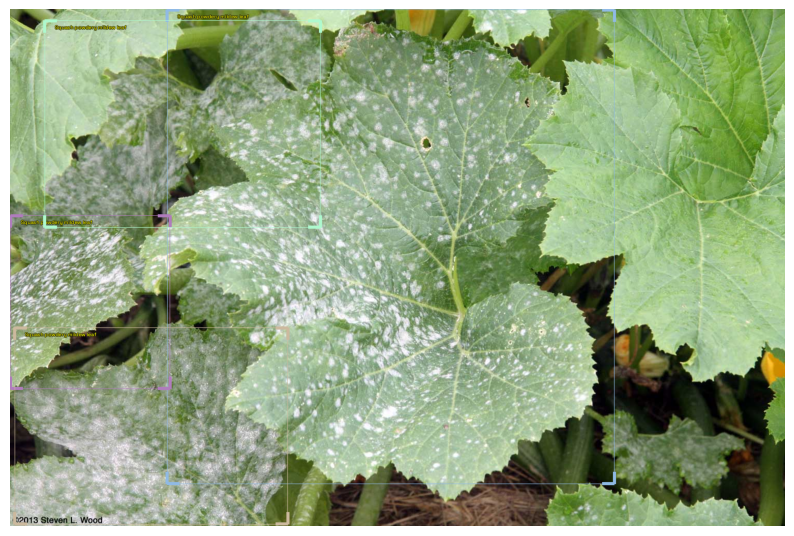

In [22]:
show_record(train_records_csv[0], figsize = (10,10), font_size=10, label_color = '#ffff00')

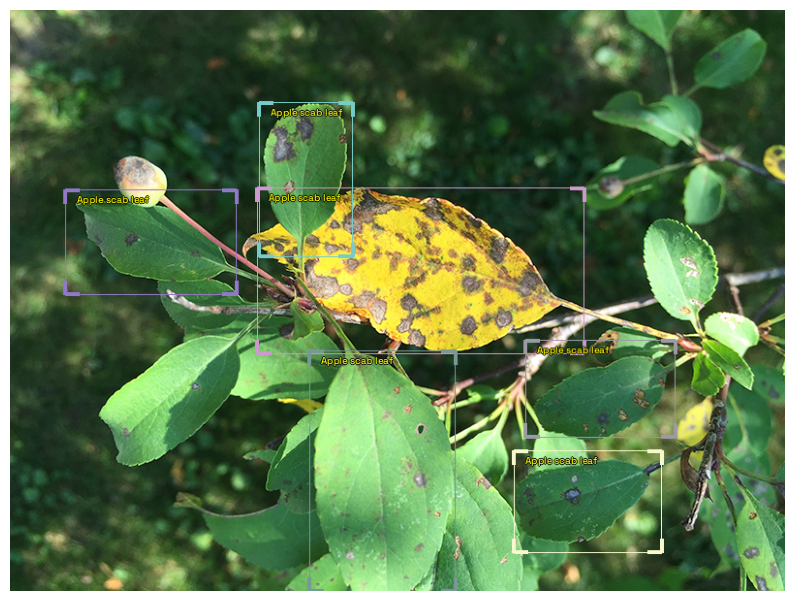

In [23]:
show_record(train_records_csv[1], figsize = (10,10), font_size=10, label_color = '#ffff00')

Transforms

In [24]:
presize = 512
image_size = 384

train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=image_size, presize = presize), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size = image_size), tfms.A.Normalize()])

Train and Validation

In [25]:
train_ds = Dataset(train_records_csv, train_tfms)
valid_ds = Dataset(valid_records_csv, valid_tfms)

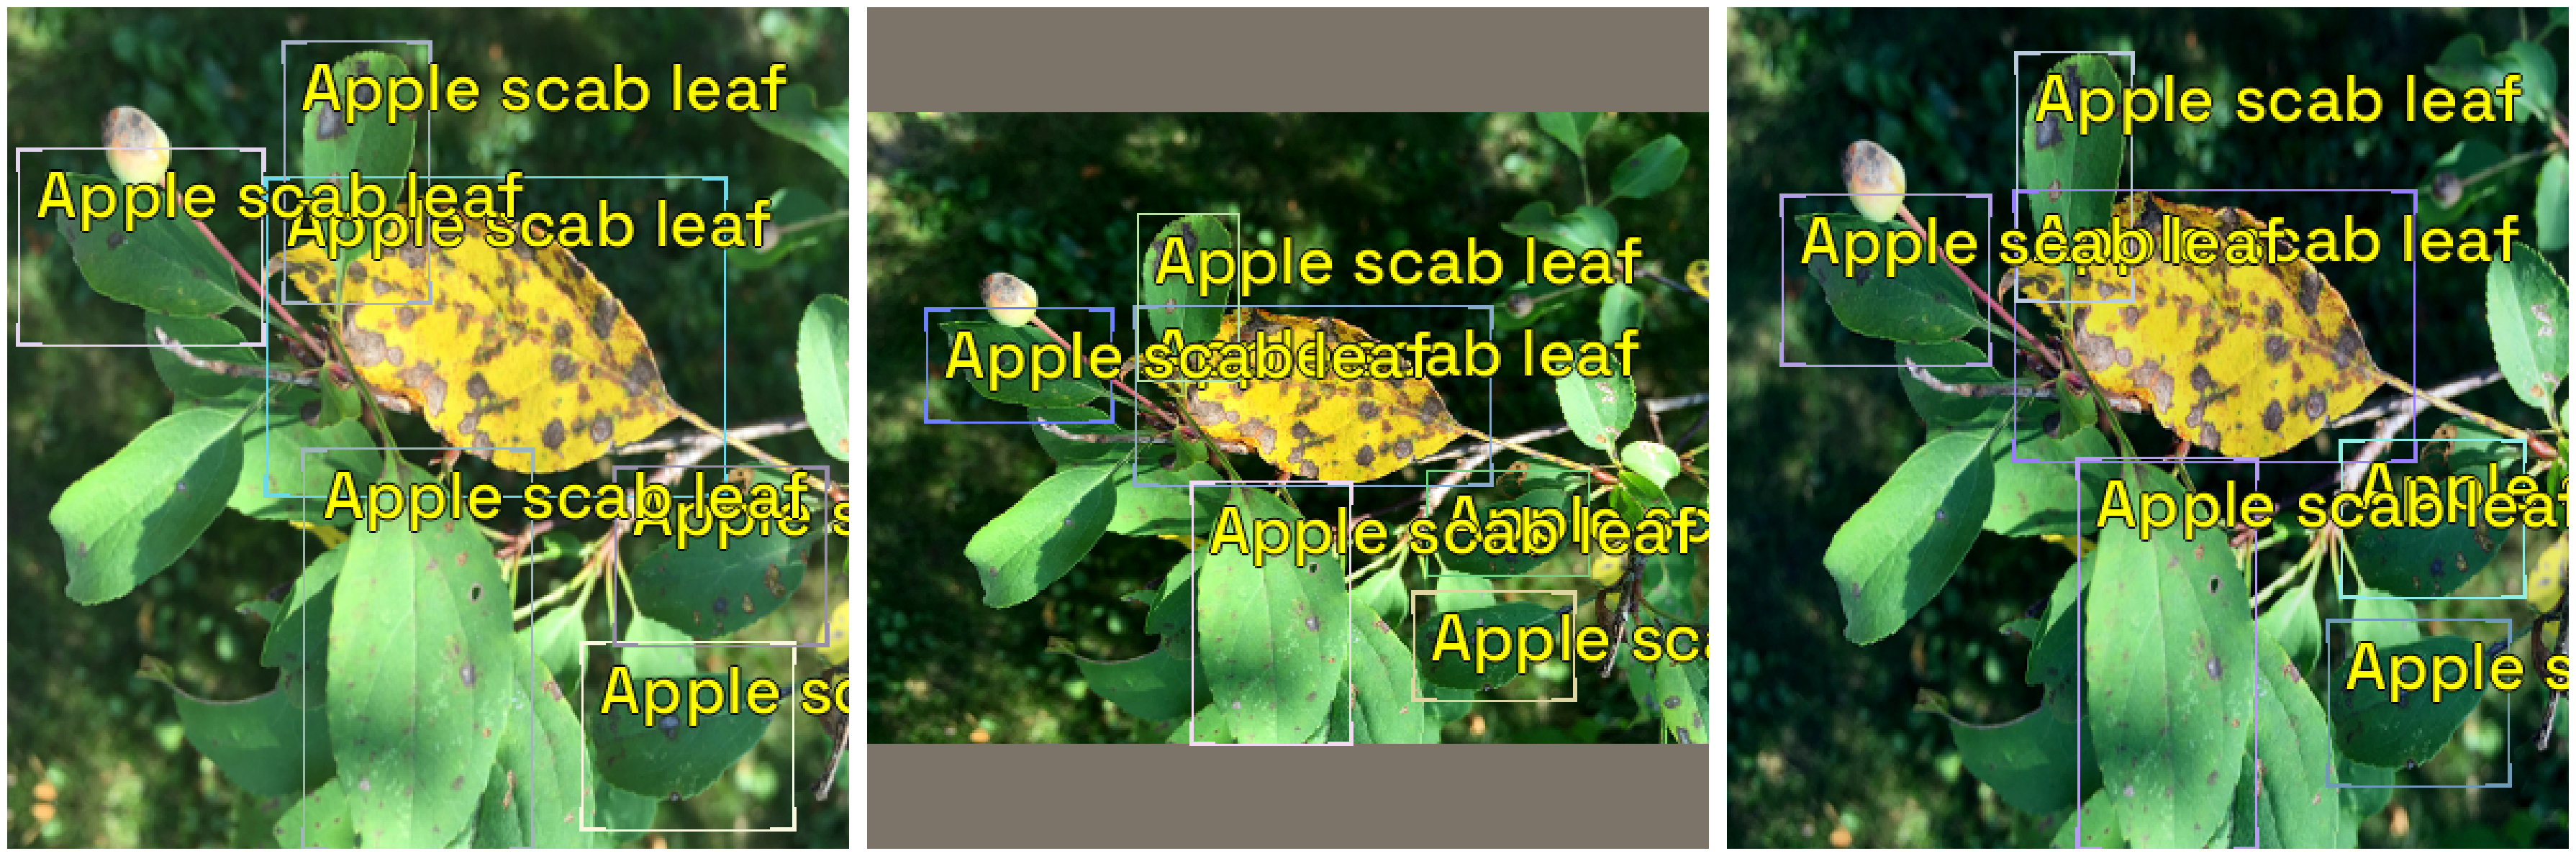

In [26]:
samples = [train_ds[1] for _ in range(3)]
show_samples(samples, ncols=3, font_size=30, label_color = '#ffff00')

In [27]:
selection = 3

extra_args = {}

if selection == 0:
  model_type = models.mmdet.retinanet
  backbone = model_type.backbones.resnet50_fpn_1x

elif selection == 1:
  #The retinanet is also implemented in the torchvision library
  model_type = models.torchvision.retinanet
  backbone = model_type.backbones.resnet50_fpn

elif selection == 2:
  model_type = models.ross.efficientdet
  backbone = model_type.backbones.tf_lite0
  extra_args['img_size'] = image_size

elif selection == 3:
  model_type = models.ultralytics.yolov5
  backbone = model_type.backbones.small
  extra_args['img_size'] = image_size

model = model_type.model(backbone = backbone(pretrained=True), num_classes = len(parser_csv.class_map), **extra_args)





  0%|          | 0.00/14.1M [00:00<?, ?B/s]

Data Loaders

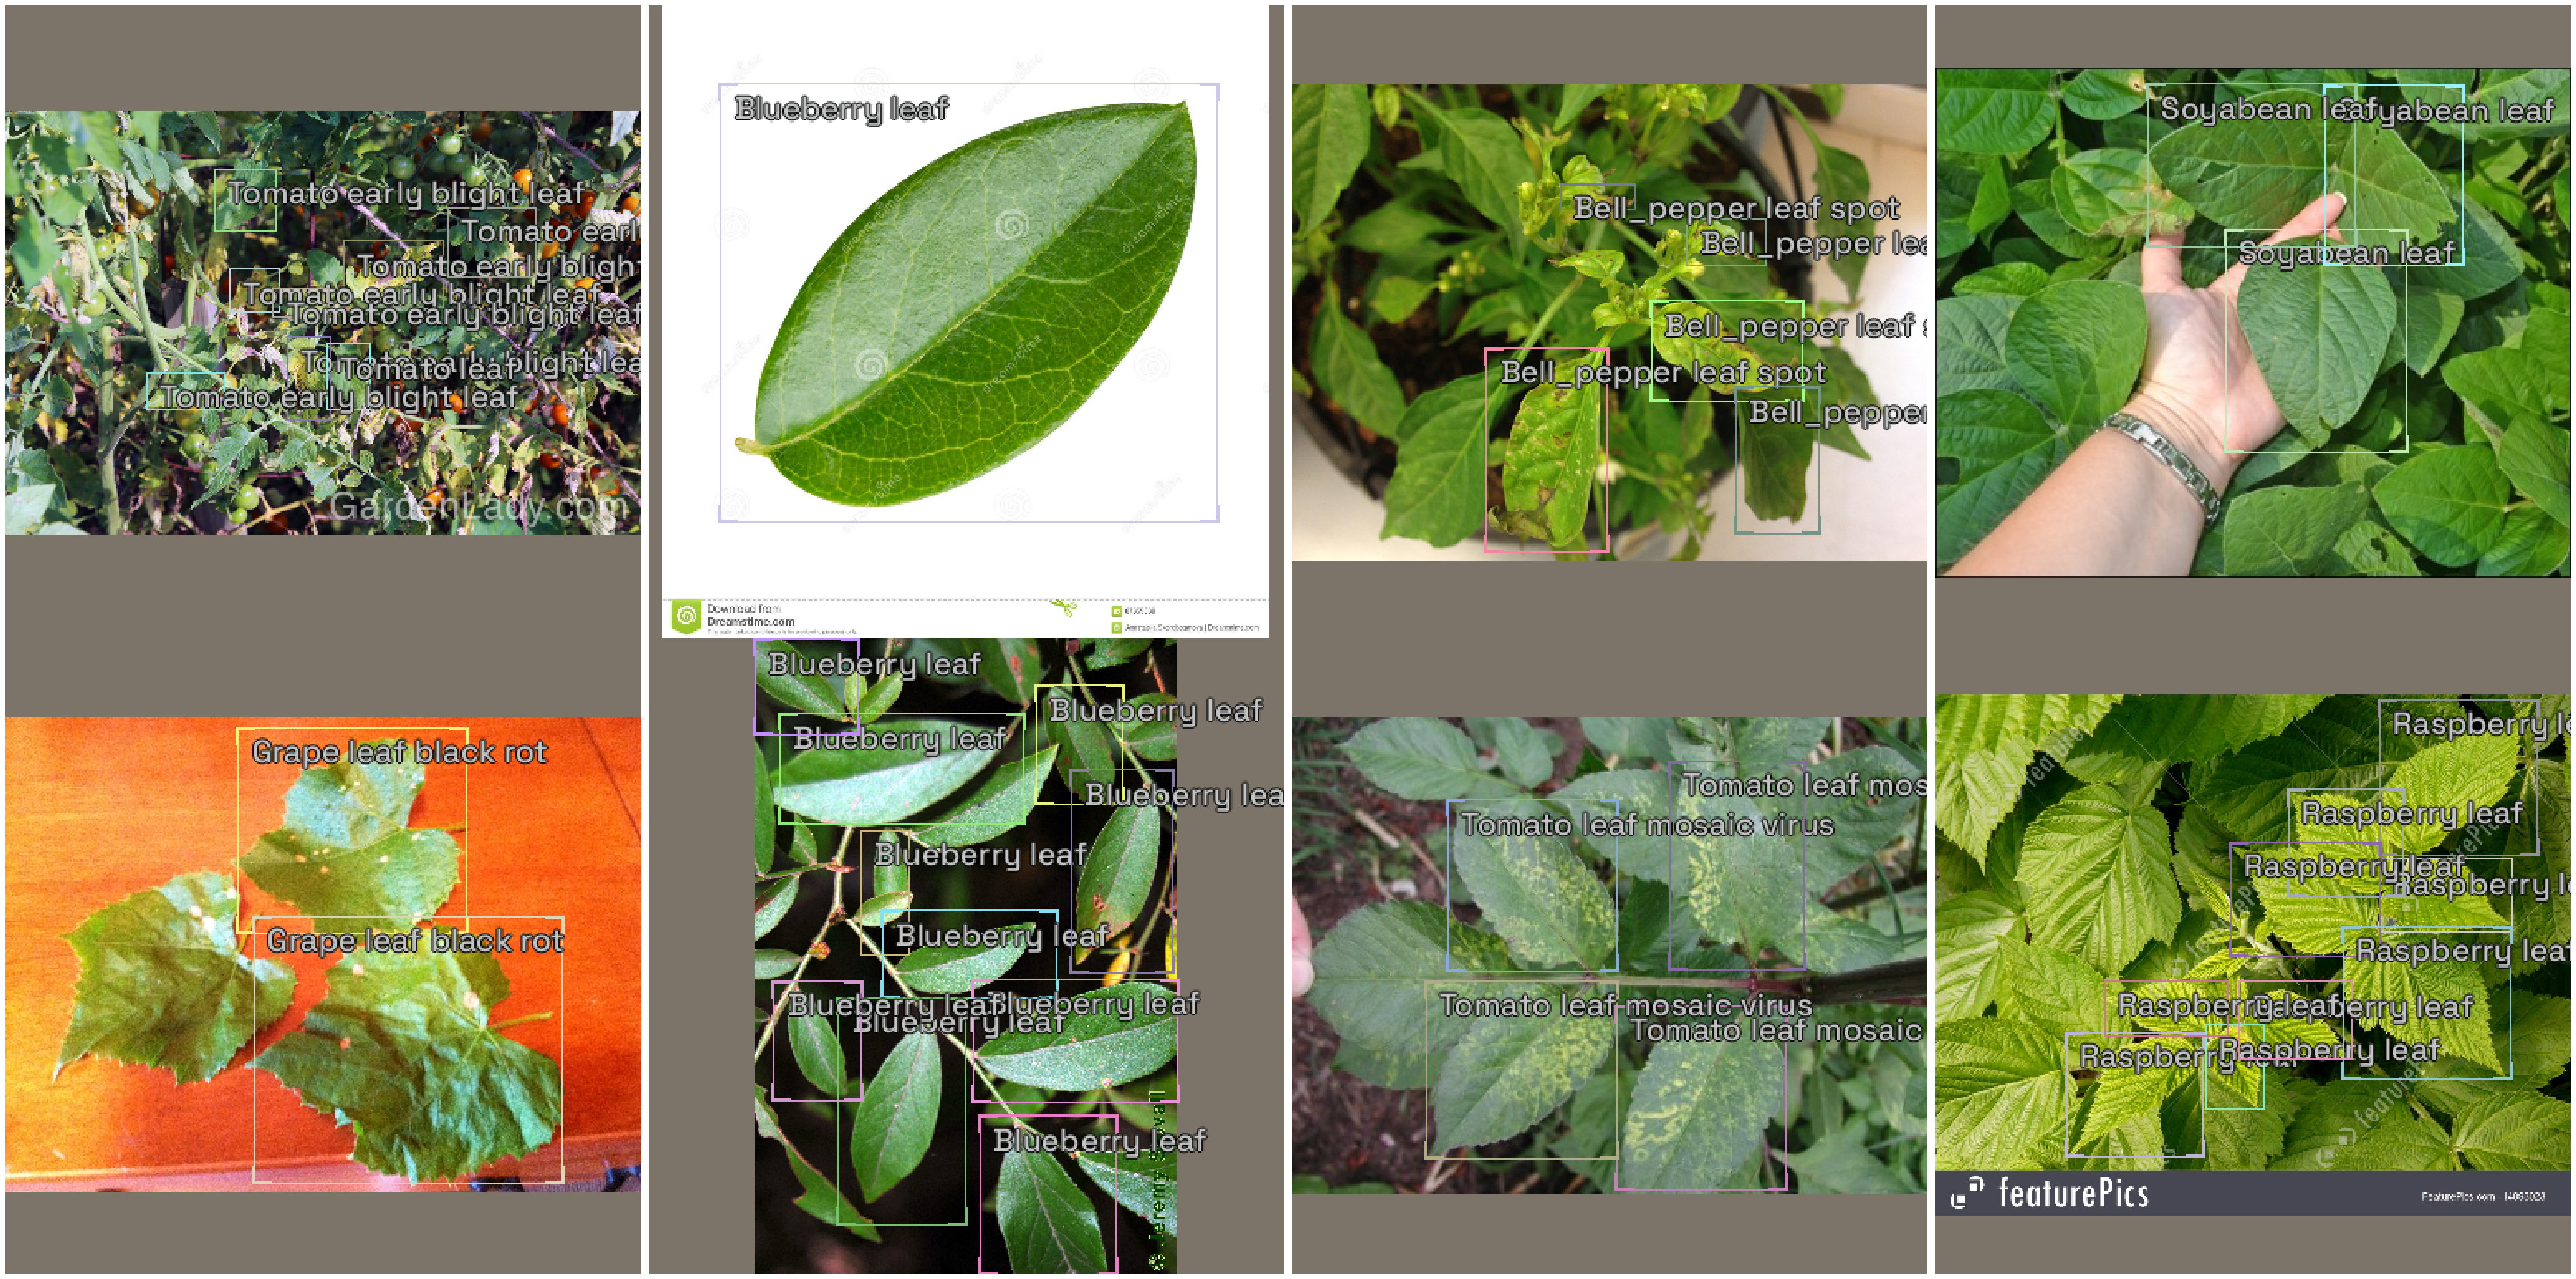

In [28]:
train_dl = model_type.train_dl(train_ds, batch_size=8, num_workers=2, shuffle = True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=8, num_workers=2, shuffle = False)

model_type.show_batch(first(valid_dl), ncols=4)

Metrics and Learner

SuggestedLRs(valley=0.010964781977236271)

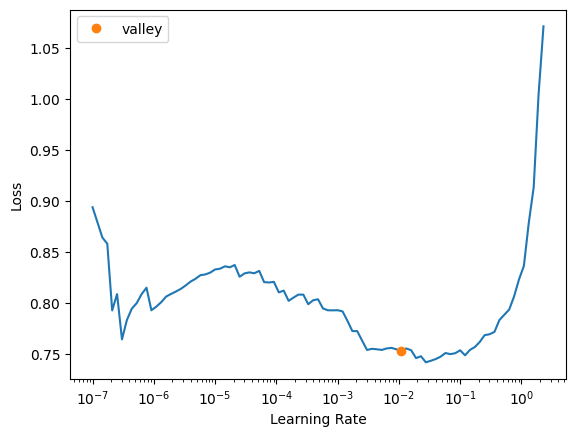

In [29]:
metrics = [COCOMetric(metric_type = COCOMetricType.bbox)]

learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)

learn.lr_find()

In [30]:
learn.fine_tune(10, 0.1, freeze_epochs=1)

/usr/local/lib/python3.8/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


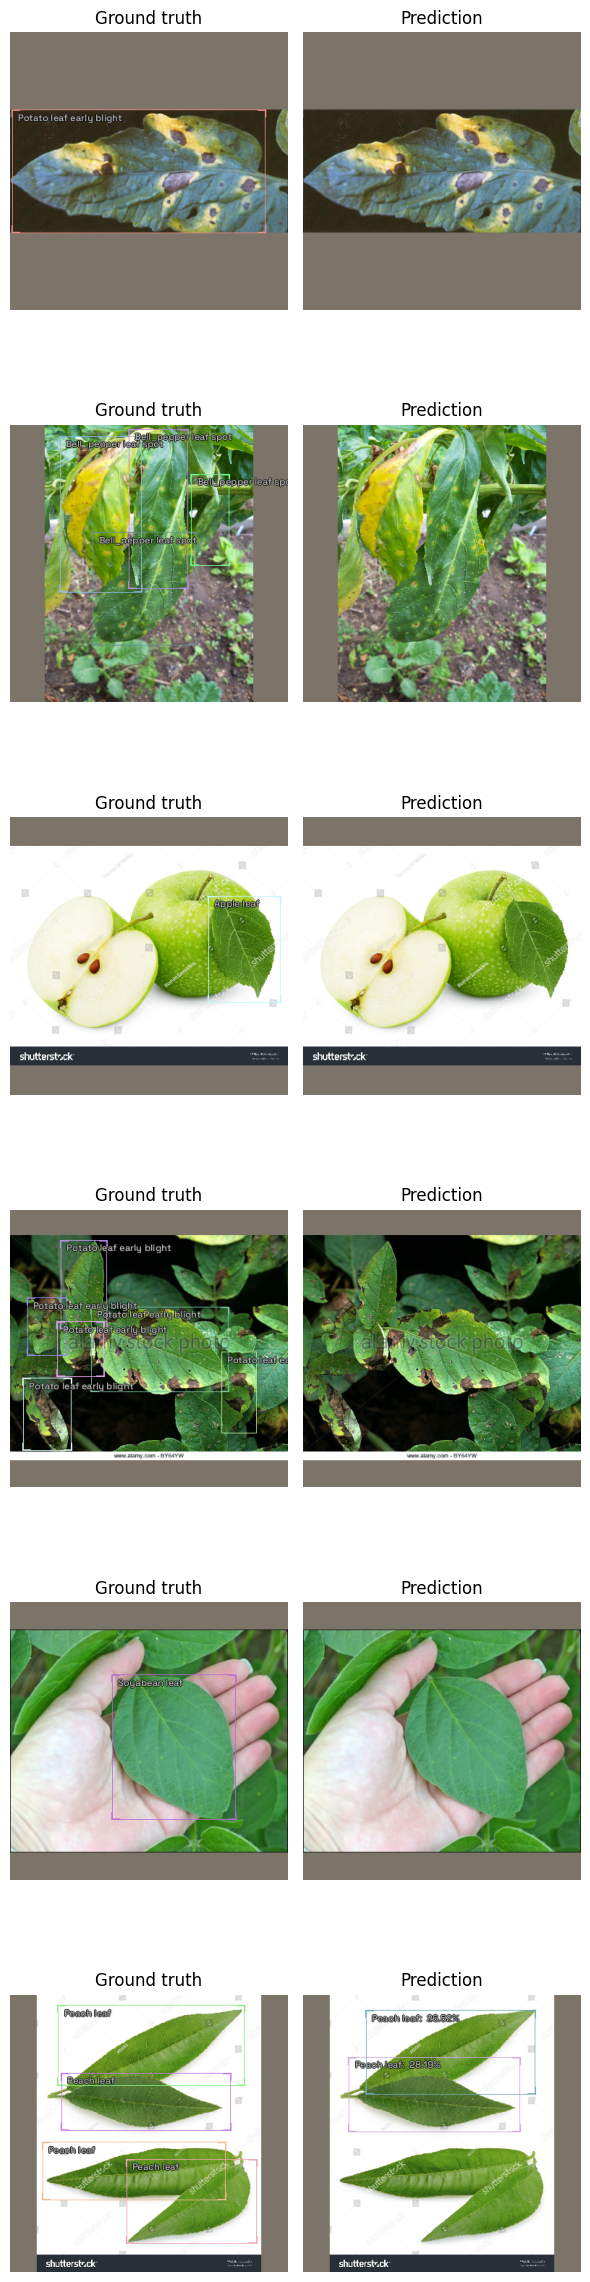

In [31]:
model_type.show_results(model, valid_ds)